In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import gensim
import nltk
from gensim.models import Word2Vec
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('conll2000')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\86156\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\86156\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\86156\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\86156\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [5]:
#Tagging Words
#You can use the following functions to find the meaning of various tags
nltk.help.upenn_tagset('VB')
nltk.help.upenn_tagset('NNS')

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...
NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...


In [6]:
#Label a piece of text in the corpus
from nltk.corpus import conll2000
x = (conll2000.tagged_sents())
for i in range(5):
     print (x[i])

[('Confidence', 'NN'), ('in', 'IN'), ('the', 'DT'), ('pound', 'NN'), ('is', 'VBZ'), ('widely', 'RB'), ('expected', 'VBN'), ('to', 'TO'), ('take', 'VB'), ('another', 'DT'), ('sharp', 'JJ'), ('dive', 'NN'), ('if', 'IN'), ('trade', 'NN'), ('figures', 'NNS'), ('for', 'IN'), ('September', 'NNP'), (',', ','), ('due', 'JJ'), ('for', 'IN'), ('release', 'NN'), ('tomorrow', 'NN'), (',', ','), ('fail', 'VB'), ('to', 'TO'), ('show', 'VB'), ('a', 'DT'), ('substantial', 'JJ'), ('improvement', 'NN'), ('from', 'IN'), ('July', 'NNP'), ('and', 'CC'), ('August', 'NNP'), ("'s", 'POS'), ('near-record', 'JJ'), ('deficits', 'NNS'), ('.', '.')]
[('Chancellor', 'NNP'), ('of', 'IN'), ('the', 'DT'), ('Exchequer', 'NNP'), ('Nigel', 'NNP'), ('Lawson', 'NNP'), ("'s", 'POS'), ('restated', 'VBN'), ('commitment', 'NN'), ('to', 'TO'), ('a', 'DT'), ('firm', 'NN'), ('monetary', 'JJ'), ('policy', 'NN'), ('has', 'VBZ'), ('helped', 'VBN'), ('to', 'TO'), ('prevent', 'VB'), ('a', 'DT'), ('freefall', 'NN'), ('in', 'IN'), ('ste

In [28]:
#Break up a sentence
sentence = "A busy and tired student is sitting in the computer-room"
tokenized_words = word_tokenize(sentence)
tokenized_words

['A',
 'busy',
 'and',
 'tired',
 'student',
 'is',
 'sitting',
 'in',
 'the',
 'computer-room']

In [29]:
#Label the sentence
for words in tokenized_words:
    tagged_word = nltk.pos_tag(tokenized_words)
tagged_word

[('A', 'DT'),
 ('busy', 'JJ'),
 ('and', 'CC'),
 ('tired', 'JJ'),
 ('student', 'NN'),
 ('is', 'VBZ'),
 ('sitting', 'VBG'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('computer-room', 'NN')]

In [30]:
#Break a sentence into meaningful phrases through chunking, phrases rather than just single words.

#Create a grammar to segregate NP
grammar = "NP : {<JJ>*<CC>?<JJ>*<NN>}"

parser = nltk.RegexpParser(grammar)

output = parser.parse(tagged_word)
print(output)

#Visualization results
output.draw()

(S
  A/DT
  (NP busy/JJ and/CC tired/JJ student/NN)
  is/VBZ
  sitting/VBG
  in/IN
  the/DT
  (NP computer-room/NN))


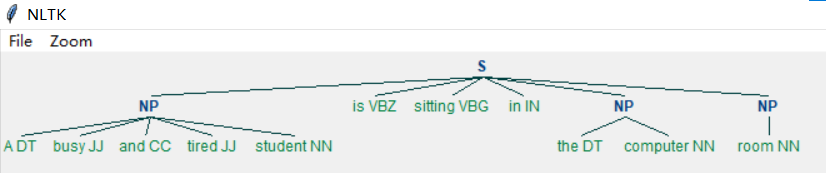

In [31]:
#Chinking

#Create a grammar to segregate adjectives
grammar = r"""NP:{<.*>+}
              }<JJ>+{"""

parser = nltk.RegexpParser(grammar)

output = parser.parse(tagged_word)
print(output)

#Visualization results
output.draw()

(S
  (NP A/DT)
  busy/JJ
  (NP and/CC)
  tired/JJ
  (NP student/NN is/VBZ sitting/VBG in/IN the/DT computer-room/NN))


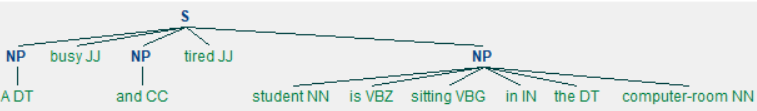

In [32]:
#Named Entity Recognition (NER)
#It can automatically identify some elements in the sentence. Countries, people, organizations, etc.

nltk.download('maxent_ne_chunker')
nltk.download('words')
sentence2 = "Eliasson who comes form Sweden in  was elected President of the U.N."

#Break the scentence
tokenized_words2 = word_tokenize(sentence2)
tokenized_words2

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\86156\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\86156\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


['Eliasson',
 'who',
 'comes',
 'form',
 'Sweden',
 'in',
 'was',
 'elected',
 'President',
 'of',
 'the',
 'U.N',
 '.']

In [33]:
for w in tokenized_words2:
    tagged_words2 = nltk.pos_tag(tokenized_words2)

In [34]:
NER = nltk.ne_chunk(tagged_words2,binary=False)

print(NER)

NER.draw()

(S
  (PERSON Eliasson/NNP)
  who/WP
  comes/VBZ
  form/VBP
  (GPE Sweden/NNP)
  in/IN
  was/VBD
  elected/VBN
  President/NNP
  of/IN
  the/DT
  (ORGANIZATION U.N/NNP)
  ./.)


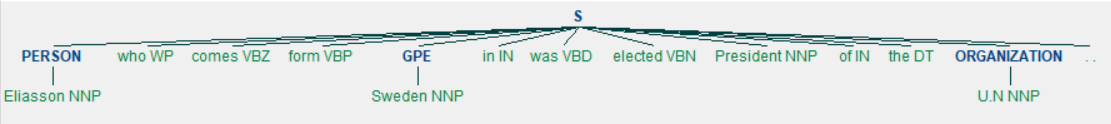